In [1]:
import sys
sys.path.append('../../')

import numpy as np

from helper import *

In [2]:
class minibatch:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x[0])
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # Sum values in rows of grad and divide by n
        grad_mean = np.sum(grad, axis=1) / self.batch_size

        return grad_mean
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=1000, eps=1e-5, eps_adagrad=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling_and_adagrad(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, eps_adagrad, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [3]:
# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 500
variance = 0.5
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

sgd = minibatch(X, y, batch_size=500)
loss_real = sgd.get_loss_history([[real_weight]])[-1]

results = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=1e-1, eps=loss_real+(loss_real*1e-1), eps_adagrad=1e-8, apply_min=True, apply_value=True)

Коэффициенты уравнения прямой:
y = 2.000 * x + 0.000
Вычисленные коэффициенты уравнения прямой Adagrad:
y = 1.933 * x + 0.000


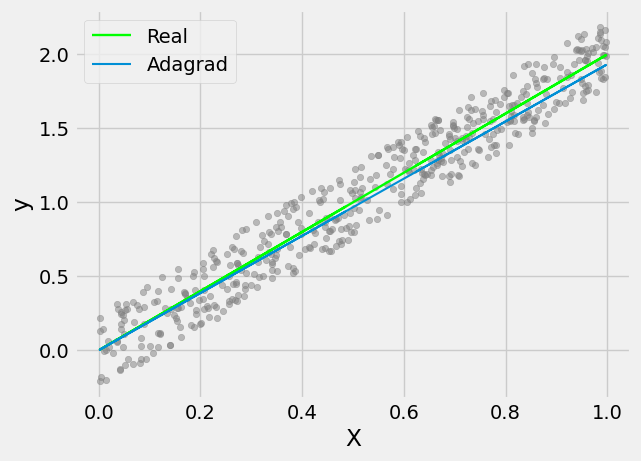

In [4]:
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.3f} * x + {real_bias:.3f}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)

plt.plot(X, results[-1][0] * X + real_bias, label='Adagrad', linewidth=1.5)
print("Вычисленные коэффициенты уравнения прямой Adagrad:")
print(f"y = {results[-1][0]:.3f} * x + {real_bias:.3f}")

plt.legend()
plt.show()

[1.4709958706736888, 1.3300279609715453, 1.23654768452646, 1.1636957914979178, 1.1030156284426793, 1.050581632729964, 1.004198723302206, 0.9624943371204168, 0.9245432985848329, 0.8896873244438829, 0.8574384740096902, 0.8274232924351801, 0.79934847954026, 0.7729787457143273, 0.7481219544472242, 0.7246188211132287, 0.7023355695747616, 0.6811585711068225, 0.6609903488112131, 0.6417465453478434, 0.6233535846599109, 0.6057468430364402, 0.5888692002306483, 0.5726698784140056, 0.5571035020676031, 0.5421293295379409, 0.5277106194611465, 0.5138141042283323, 0.5004095492027768, 0.4874693812273306, 0.47496837356782007, 0.46288337716339684, 0.45119309013452663, 0.4398778591015373, 0.4289195071119092, 0.4183011839503033, 0.40800723537590217, 0.39802308844456036, 0.3883351505641061, 0.378930720326741, 0.36979790848326183, 0.36092556768542117, 0.35230322983722795, 0.3439210500727487, 0.3357697565243584, 0.32784060516717806, 0.32012533912721436, 0.31261615192612136, 0.3053056542074693, 0.2981868435502

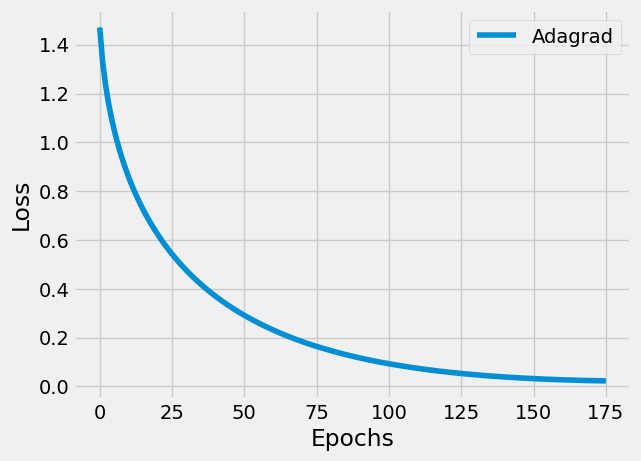

In [5]:
loss_history = sgd.get_loss_history(results)
loss_real = sgd.get_loss_history([[real_weight]])[-1]

print(loss_history)

plt.plot(loss_history, label="Adagrad")
print("Значение функции потерь:")
print(f"real = {loss_real}")
print(f"Adagrad = {loss_history[-1]}")
print(f"diff = {loss_history[-1] - loss_real}\n")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()